In [112]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(12,10)})

### Loading the Dataset

In [113]:
dataload = pd.read_csv("data/imdb_series.csv")
dataload

,ranking,title,year,duration,genre,rating,directors,votes
0,"5,406.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
1,"5,407.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
2,"5,408.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
3,"5,409.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
4,"5,410.",Cops,(1989–2023),NaN,NaN,7.0,NaN,12.0
...,...,...,...,...,...,...,...,...
9395,"6,471.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.4,NaN,168.0
9396,"6,472.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.5,NaN,140.0
9397,"6,473.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.6,NaN,128.0
9398,"6,474.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.3,NaN,146.0


In [114]:
dataload.columns

Index(['ranking', 'title', 'year', 'duration', 'genre', 'rating', 'directors',
       'votes'],
      dtype='object')

### After cleaning up and isolating the data needed

In [115]:
dataload_ex = dataload.dropna()
dataload_ex.head(20)

,ranking,title,year,duration,genre,rating,directors,votes
225,"6,961.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",5.3,"Christopher Berkeley,Chris Dozois,Tara Strong,...",27.0
231,"6,967.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",5.6,"Tim Eldred,Bob Fuentes III,Tara Strong,Maurice...",25.0
237,"6,973.",Extreme Ghostbusters,(1997),20 min,"Animation, Action, Adventure",7.1,"Christopher Berkeley,Chris Dozois,Tara Strong,...",32.0
245,"6,981.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",6.4,"Gloria Jenkins,Scott Wood,Tara Strong,Maurice ...",40.0
405,"1,178.",The Adventures of Robin Hood,(1955–1960),25 min,"Action, Adventure, Family",6.9,"Terry Bishop,Sidney Cole,Richard Greene,Archie...",26.0
406,"1,179.",The Adventures of Robin Hood,(1955–1960),25 min,"Action, Adventure, Family",7.4,"Ralph Smart,Daniel Birt,Richard Greene,Alexand...",80.0
441,"1,214.",The Adventures of Robin Hood,(1955–1960),25 min,"Action, Adventure, Family",7.0,"Terence Fisher,Bernard Knowles,Ian Hunter,Patr...",39.0
448,"1,221.",The Adventures of Robin Hood,(1955–1960),25 min,"Action, Adventure, Family",7.3,"Ralph Smart,Bernard Knowles,Alan Wheatley,Leo ...",104.0
621,225.,Emergency!,(1972–1979),60 min,"Action, Adventure, Comedy",8.6,"Robert A. Cinader,Randolph Mantooth,Randolph M...",122.0
623,227.,ReBoot,(1994–2001),24 min,"Animation, Action, Adventure",8.8,"Michael Robison,Dick Zondag,Michael Benyaer,Ka...",89.0


# Analysing the data

### Using the data we find which genres were the top genre for the years mentioned on the website

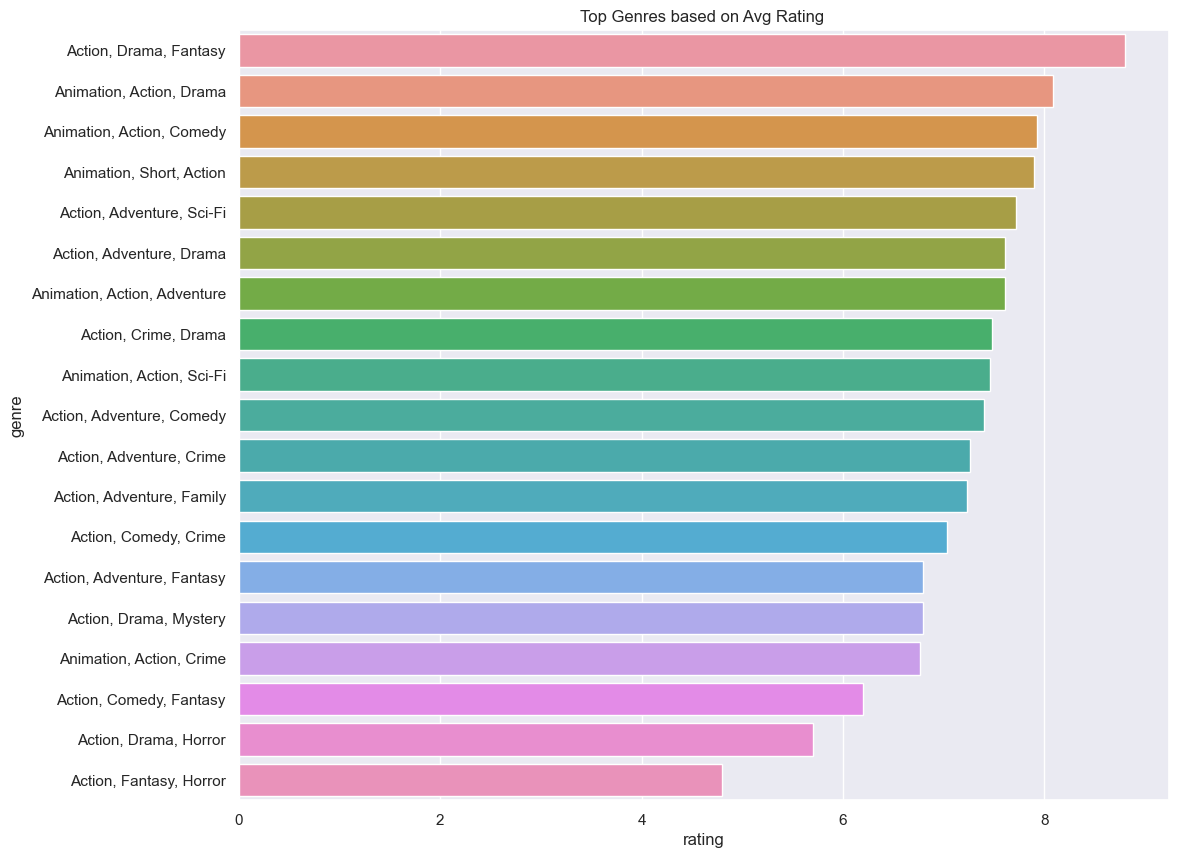

                           genre    rating
9         Action, Drama, Fantasy  8.800000
16      Animation, Action, Drama  8.082609
14     Animation, Action, Comedy  7.928571
18      Animation, Short, Action  7.898551
5      Action, Adventure, Sci-Fi  7.720000
2       Action, Adventure, Drama  7.614286
13  Animation, Action, Adventure  7.613821
8           Action, Crime, Drama  7.483333
17     Animation, Action, Sci-Fi  7.464286
0      Action, Adventure, Comedy  7.400000
1       Action, Adventure, Crime  7.263636
3      Action, Adventure, Family  7.228571
6          Action, Comedy, Crime  7.033333
4     Action, Adventure, Fantasy  6.800000
11        Action, Drama, Mystery  6.791667
15      Animation, Action, Crime  6.766667
7        Action, Comedy, Fantasy  6.200000
10         Action, Drama, Horror  5.700000
12       Action, Fantasy, Horror  4.800000


In [116]:
# grouping data

dataload_ex_copy1 = dataload_ex.copy()

genre_avg_rating = dataload_ex_copy1.explode('genre').groupby('genre')['rating'].mean().reset_index()
genre_avg_rating = genre_avg_rating.sort_values("rating", ascending=False)
# plot
sns.barplot(data=genre_avg_rating, x="rating",y="genre")
plt.ylabel('genre')
plt.xlabel('rating')
plt.title('Top Genres based on Avg Rating ')

plt.show()
print(genre_avg_rating)

### Listing the top 20 directors based on their average ratings

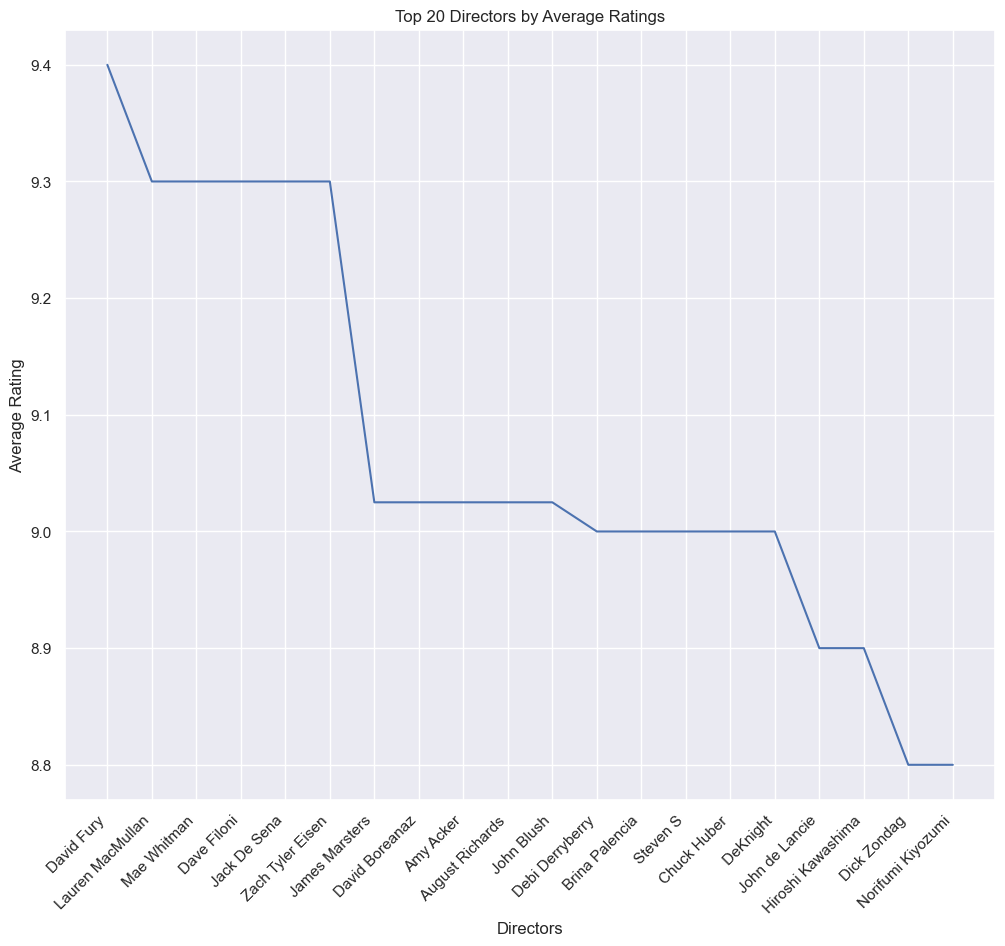

             directors  rating
167         David Fury   9.400
381   Lauren MacMullan   9.300
404        Mae Whitman   9.300
162        Dave Filoni   9.300
265       Jack De Sena   9.300
720   Zach Tyler Eisen   9.300
276     James Marsters   9.025
165     David Boreanaz   9.025
54           Amy Acker   9.025
2      August Richards   9.025
299         John Blush   9.025
175    Debi Derryberry   9.000
101     Brina Palencia   9.000
613           Steven S   9.000
134        Chuck Huber   9.000
7             DeKnight   9.000
311     John de Lancie   8.900
250  Hiroshi Kawashima   8.900
180        Dick Zondag   8.800
484  Norifumi Kiyozumi   8.800


In [117]:


dataload_ex_copy = dataload_ex.copy()

# grouping data
dataload_ex_copy.loc[:, 'directors'] = dataload_ex_copy['directors'].astype(str).str.replace(r"[^a-zA-Z0-9\s]", ",", regex=True)
dataload_ex_copy.loc[:, 'directors'] = dataload_ex_copy['directors'].str.split(',')

# Calculate the average ratings of each director
director_rating_average = dataload_ex_copy.explode('directors').groupby('directors')['rating'].mean().reset_index()

# Sorting directors by their average ratings
director_rating_average = director_rating_average.sort_values('rating', ascending=False)


top_directors = director_rating_average.head(20)

# plotting
sns.lineplot(x='directors', y='rating', data=top_directors)
plt.ylabel('Average Rating')
plt.xlabel('Directors')
plt.title('Top 20 Directors by Average Ratings')
plt.xticks(rotation=45, ha='right')  
plt.show()

print(top_directors)

### Listing Top 20 titles based on their average ratings

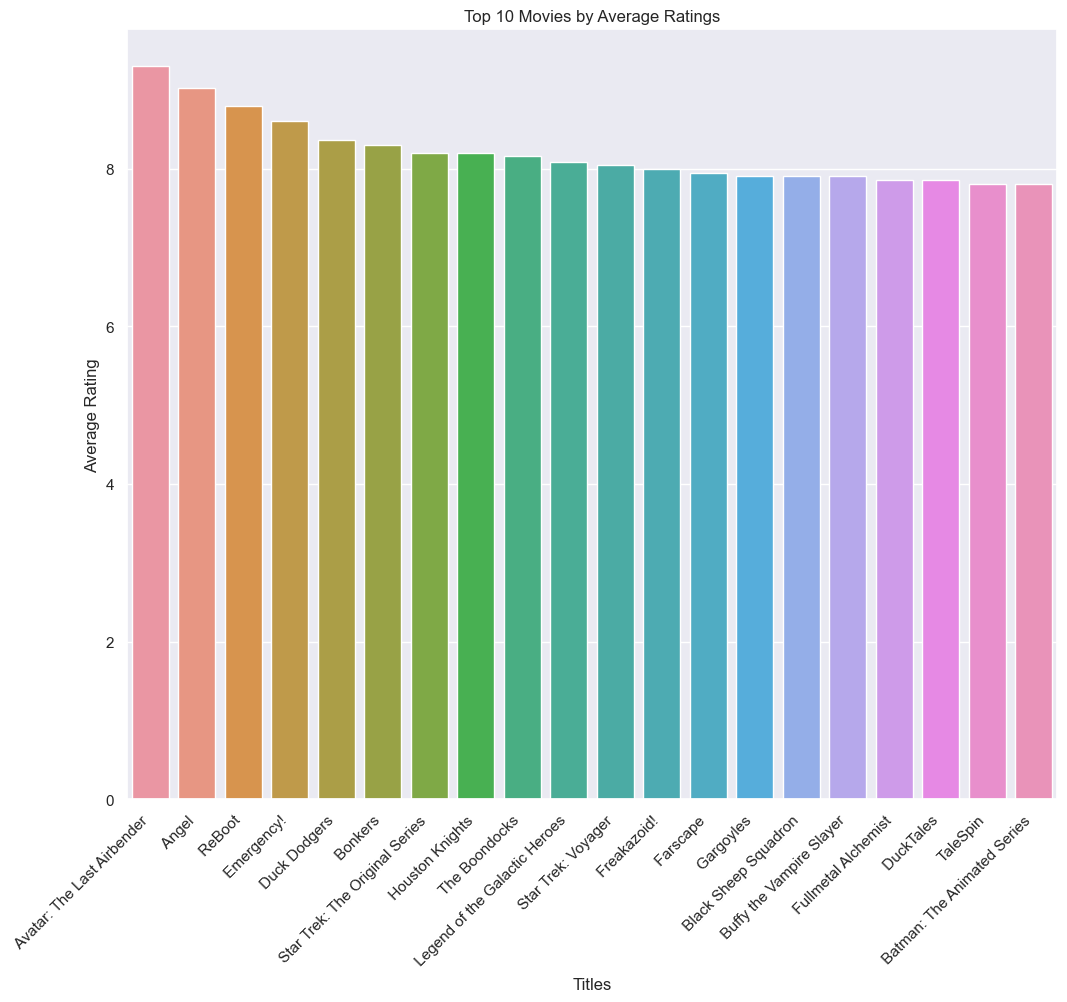

                              title    rating
6        Avatar: The Last Airbender  9.300000
5                             Angel  9.025000
49                           ReBoot  8.800000
32                       Emergency!  8.600000
29                     Duck Dodgers  8.360714
13                          Bonkers  8.300000
53   Star Trek: The Original Series  8.200000
45                  Houston Knights  8.200000
60                    The Boondocks  8.160000
47    Legend of the Galactic Heroes  8.082609
54               Star Trek: Voyager  8.050000
37                      Freakazoid!  8.000000
36                         Farscape  7.950000
40                        Gargoyles  7.900000
11             Black Sheep Squadron  7.900000
14         Buffy the Vampire Slayer  7.900000
38              Fullmetal Alchemist  7.857143
30                        DuckTales  7.850000
55                         TaleSpin  7.800000
7       Batman: The Animated Series  7.800000


In [118]:
dataload_ex_copy2 = dataload_ex.copy()
movie_rating_average = dataload_ex_copy2.explode("title").groupby("title")["rating"].mean().reset_index()
movie_rating_average = movie_rating_average.sort_values("rating", ascending= False)
top_movies = movie_rating_average.head(20)

sns.barplot(x="title", y="rating", data=top_movies)
plt.ylabel('Average Rating')
plt.xlabel('Titles')
plt.title('Top 10 Movies by Average Ratings')
plt.xticks(rotation=45, ha='right')  
plt.show()

print(top_movies)


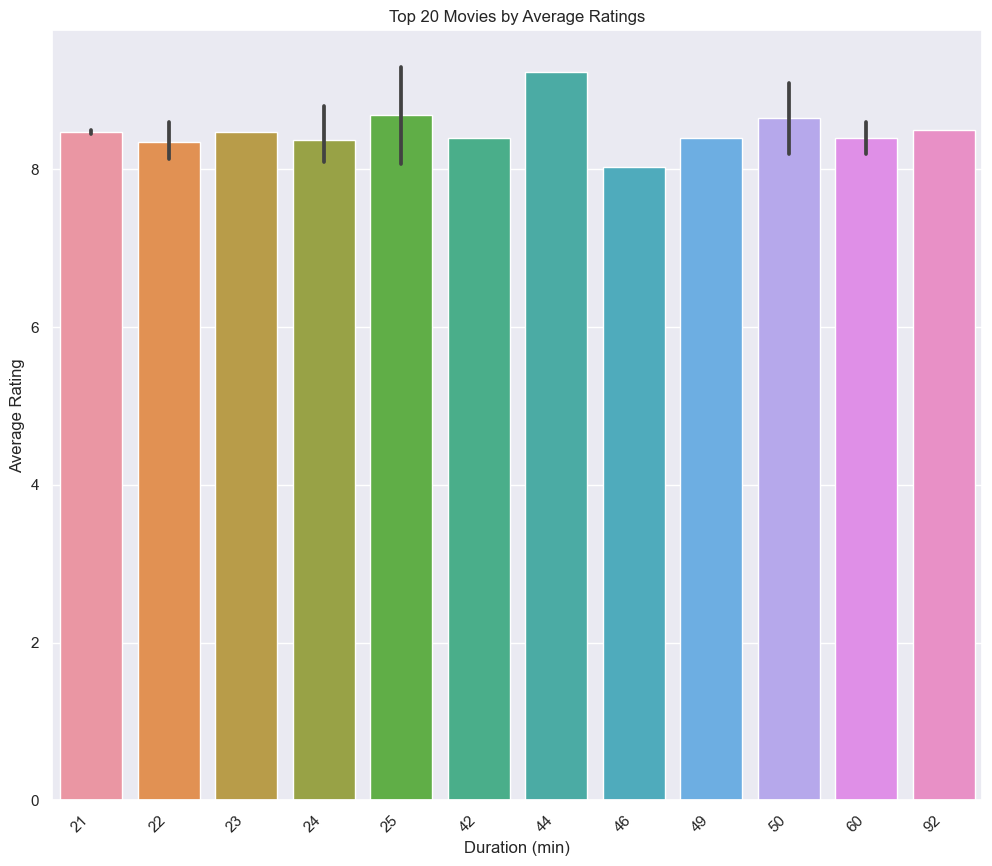

                              title  duration    rating
8        Avatar: The Last Airbender        25  9.300000
7                             Angel        44  9.233333
30                    Danny Phantom        50  9.100000
73                           ReBoot        24  8.800000
43                     Duck Dodgers        22  8.600000
49                       Emergency!        60  8.600000
80               Star Trek: Voyager        92  8.500000
89                    The Boondocks        21  8.500000
44                     Duck Dodgers        23  8.476923
42                     Duck Dodgers        21  8.450000
29                    Danny Phantom        49  8.400000
6                             Angel        42  8.400000
15                          Bonkers        22  8.300000
45                     Duck Dodgers        24  8.218182
78   Star Trek: The Original Series        50  8.200000
68                  Houston Knights        60  8.200000
90                    The Boondocks        22  8

In [121]:

dataload_ex_copy3 = dataload_ex.copy()

dataload_ex_copy3["duration"] = dataload_ex_copy3["duration"].str.extract("(\d+)").astype(int)

movie_time_average = dataload_ex_copy3.groupby(["title", "duration"])["rating"].mean().reset_index()
movie_time_average = movie_time_average.sort_values("rating", ascending=False)
time_movies = movie_time_average.head(20)


sns.barplot(x="duration", y="rating", data=time_movies)
plt.ylabel('Average Rating')
plt.xlabel('Duration (min)')
plt.title('Top 20 Movies by Average Ratings')
plt.xticks(rotation=45, ha='right')  
plt.show()


print(time_movies)


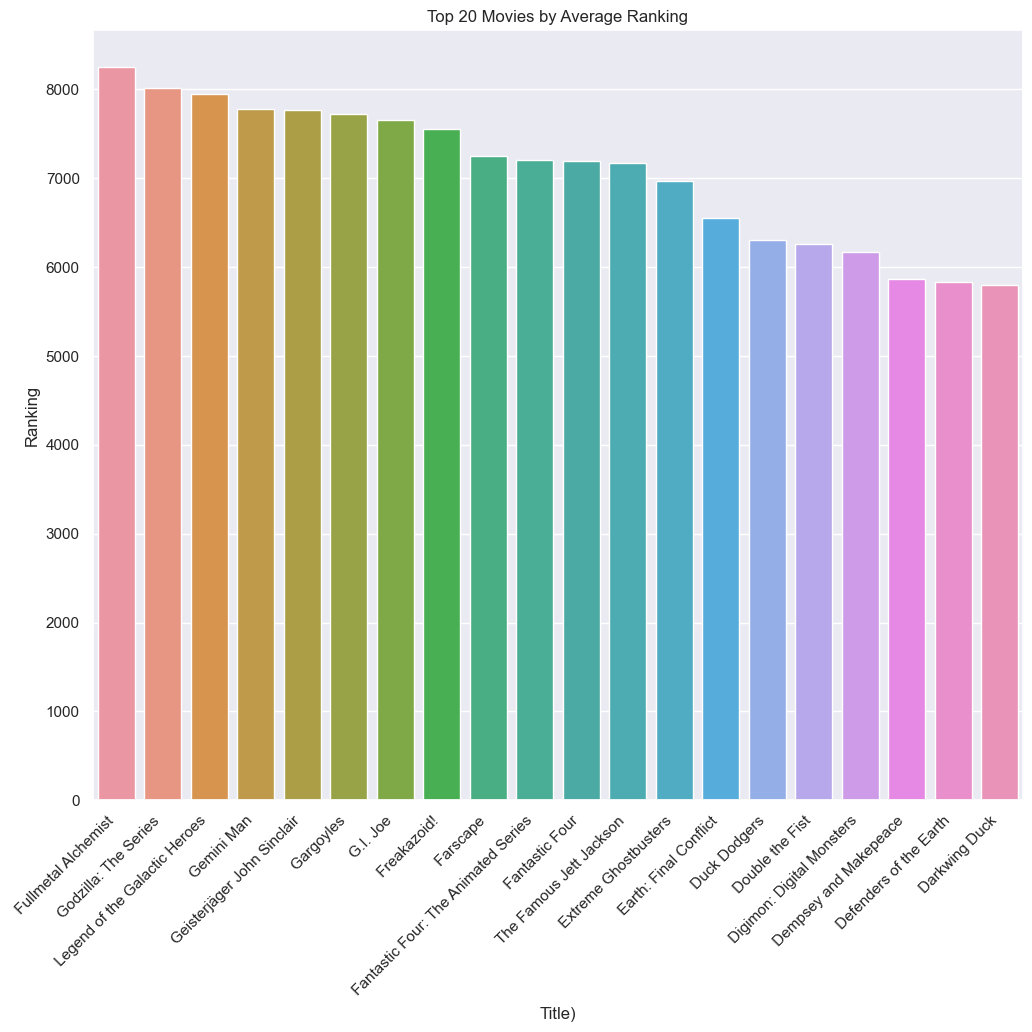

                                   title      ranking
38                   Fullmetal Alchemist  8253.142857
43                  Godzilla: The Series  8018.000000
47         Legend of the Galactic Heroes  7947.413043
42                            Gemini Man  7775.000000
41            Geisterjäger John Sinclair  7768.000000
40                             Gargoyles  7718.500000
39                              G.I. Joe  7652.666667
37                           Freakazoid!  7558.555556
36                              Farscape  7256.250000
35   Fantastic Four: The Animated Series  7211.083333
34                        Fantastic Four  7198.500000
61               The Famous Jett Jackson  7167.000000
33                  Extreme Ghostbusters  6973.800000
31                 Earth: Final Conflict  6550.200000
29                          Duck Dodgers  6305.892857
28                       Double the Fist  6259.000000
26             Digimon: Digital Monsters  6164.807229
25                 Dempsey a

In [130]:
dataload_ex_copy4 = dataload_ex.copy()

dataload_ex_copy4['ranking'] = dataload_ex_copy4['ranking'].str.replace(',', '').astype(float)

movie_ranking = dataload_ex_copy4.groupby("title")["ranking"].mean().reset_index()
movie_ranking = movie_ranking.sort_values("ranking", ascending=False)
top_movies = movie_ranking.head(20)


sns.barplot(x="title", y="ranking", data=top_movies)
plt.ylabel('Ranking')
plt.xlabel('Title)')
plt.title('Top 20 Movies by Average Ranking')
plt.xticks(rotation=45, ha='right')  
plt.show()


print(top_movies)